In [148]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Question 5 : Support Vector Machine (Predict the author name given the text of that author) 

Importing the libraries

In [0]:
import numpy as np
import pandas as pd
import re
import string
from sklearn import svm

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer


### Reading the data from Train.csv

In [150]:
dataset=pd.read_csv("/content/drive/My Drive/Question-5/Train(1).csv")
dataset

,Unnamed: 0,text,author
0,0,The sight of the military restored hope to tho...,MWS
1,1,Just as the building was wiped out by a German...,HPL
2,2,Do you wonder how it will seem?,HPL
3,3,"My revenge is of no moment to you; yet, while ...",MWS
4,4,"If he dares to reply, you can tell him from Lu...",EAP
...,...,...,...
15658,15658,"Get bald, too, very young.",HPL
15659,15659,I performed the first part of my journey on ho...,MWS
15660,15660,"He had a narrow head, bulging, watery blue eye...",HPL
15661,15661,There does not exist the man in England with a...,MWS


In [0]:
y=dataset['author']

### Processing the data

In [0]:

def remove_punctuation(line):
    return line.translate(str.maketrans('', '', string.punctuation))

def remove_numbers(line):
    return re.sub(r'\d+', '', line)

def to_replace_newline(line):
    return line.replace('\n',' ')
  
def remove_spaces(line):
    return " ".join(line.split(' '))

#### Stemming

Stemming is the process of producing morphological variants of a root/base word.

like work, works , worked, working will be replaced the its root word work.

In [153]:
#for stemming the data
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import PorterStemmer

import nltk
nltk.download('punkt')

porter=PorterStemmer()

def stemSentence(sentence):
    token_words=word_tokenize(sentence)
    token_words
    stem_sentence=[]
    for word in token_words:
        stem_sentence.append(porter.stem(word))
        stem_sentence.append(" ")
    return "".join(stem_sentence)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [0]:
listt=[]
for i in range(dataset.shape[0]):
    line=to_replace_newline(dataset['text'][i])   #replace newline with space
    line=remove_punctuation(line) #remove punctuation
    line=remove_spaces(line)    #remove extra spaces
    line=line.replace('\s',' ')
    line = remove_numbers(line) #remove digits
    line=stemSentence(line)  #stemming
    listt.append(line)

In [155]:
listt

['the sight of the militari restor hope to those who fled and reveng took place of fear ',
 'just as the build wa wipe out by a german shell there had been a success ',
 'Do you wonder how it will seem ',
 'My reveng is of no moment to you yet while I allow it to be a vice I confess that it is the devour and onli passion of my soul ',
 'If he dare to repli you can tell him from lucan here it is that speech are mere anemona verborum anemon word ',
 'I wa troubl a mist came over my eye and I felt a faint seiz me but I wa quickli restor by the cold gale of the mountain ',
 'My dear victor cri he what for god sake is the matter ',
 'wise men told him hi simpl fanci were inan and childish and he believ it becaus he could see that they might easili be so ',
 'Ye god and what do I behold is that the depart spirit the shade the ghost of my belov puppi which I perceiv sit with a grace so melancholi in the corner ',
 'confus memori mix themselv with hi mathemat and he believ hi subconsci mind he

## TfIdfVectorizer

Tf-idf stands for term frequency-inverse document frequency, and the tf-idf weight is a weight often used in information retrieval and text mining. This weight is a statistical measure used to evaluate how important a word is to a document in a collection or corpus. The importance increases proportionally to the number of times a word appears in the document but is offset by the frequency of the word in the corpus. Variations of the tf-idf weighting scheme are often used by search engines as a central tool in scoring and ranking a document's relevance given a user query.

Term Frequency :

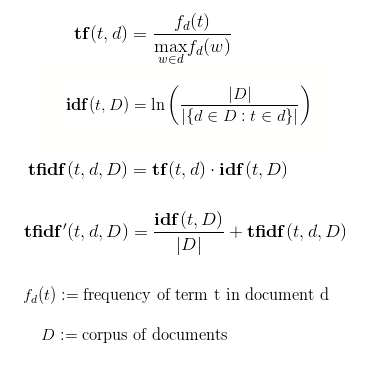

In [156]:
word_vectorizer = TfidfVectorizer(min_df=1,stop_words='english')

word_vectorizer.fit(listt)
features = word_vectorizer.transform(listt)
df_vectors = features.toarray()
vocabulary = word_vectorizer.get_feature_names()
len(vocabulary)

14315

### Concatenating the words to the dataset

In [0]:
dataset = pd.concat(
    [
        dataset,
        pd.DataFrame(
            df_vectors, 
            index=dataset.index, 
            columns=vocabulary
        )
    ], axis=1
)

In [158]:
dataset=dataset.drop([dataset.columns[0],dataset.columns[1],dataset.columns[2]], axis = 1) 
dataset

,aaem,ab,aback,abaft,abandon,abaout,abas,abash,abat,abbey,abbrevi,abbé,abdic,abdomen,abdul,abernethi,aberr,abey,abhor,abhorr,abid,abigail,abijah,abil,abject,abjur,abl,ablaz,abli,abnorm,aboard,abod,abolish,abomin,abort,abound,abov,abreast,abroad,abrupt,...,zair,zann,zar,zath,zay,zeal,zealand,zebub,zebulon,zechariah,zee,zenith,zenobia,zephyr,zerubbabel,zest,zide,zigzag,zimmer,zimmerman,zit,zobna,zodiac,zokkar,zone,zopyru,zorri,zubmizzion,zuro,ædile,ægyptu,æmilianu,æneid,ærial,æronaut,æschylu,élite,émeut,οἶδα,υπνος
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15658,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15659,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15660,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15661,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
dataset=dataset.values
y=y.values

## PCA

In [0]:
from sklearn.decomposition import PCA
pca = PCA(n_components=500)
dataset=pca.fit_transform(dataset)

In [161]:
# model=MinMaxScaler()
# X_minmax = model.fit_transform(dataset)

X_train, X_test, y_train, y_test = train_test_split(dataset, y, test_size=0.2, random_state=0)
dataset.shape

(15663, 500)

In [162]:
X_train

array([[-0.03025088, -0.03174203, -0.00226632, ...,  0.0048244 ,
         0.00058706,  0.00444116],
       [-0.0170586 ,  0.07460044, -0.04471555, ...,  0.00275151,
        -0.00546078,  0.00717516],
       [-0.02039622,  0.02599357, -0.03012782, ...,  0.00316521,
         0.00113364, -0.03173185],
       ...,
       [-0.02243848, -0.03898192, -0.01993322, ...,  0.03767117,
         0.00729283,  0.00830807],
       [-0.02396548, -0.00945176,  0.09594833, ..., -0.0003821 ,
        -0.01758466, -0.01451709],
       [-0.00980292,  0.07483706, -0.04720299, ..., -0.02558175,
        -0.01452221,  0.02632086]])

### Kernels

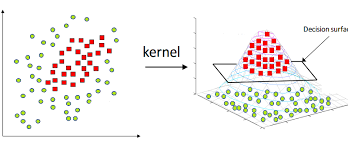


### SVM kernel='linear'

In [163]:

classifier=svm.SVC(kernel='linear',C=1.0,decision_function_shape='ovr')
classifier.fit(X_train,y_train)
prediction=classifier.predict(X_test)
accu = accuracy_score(y_test,prediction)
print('Accuracy : ',accu)
cm=confusion_matrix(y_test,prediction)
print('Confusion Matrix : ',cm)
precision = precision_score(y_test,prediction,average=None)
print('Precision : ',precision)
recall = recall_score(y_test,prediction,average=None)
print('Recall : ',recall)
f1s = f1_score(y_test,prediction,average=None)
print('F1-Score : ',f1s)
report=classification_report(y_test,prediction)
print('classification_report',report)

Accuracy :  0.7277369932971592
Confusion Matrix :  [[1028  135  112]
 [ 242  603   60]
 [ 218   86  649]]
Precision :  [0.69086022 0.73179612 0.79049939]
Recall :  [0.80627451 0.66629834 0.68100735]
F1-Score :  [0.74411871 0.69751301 0.73167982]
classification_report               precision    recall  f1-score   support

         EAP       0.69      0.81      0.74      1275
         HPL       0.73      0.67      0.70       905
         MWS       0.79      0.68      0.73       953

    accuracy                           0.73      3133
   macro avg       0.74      0.72      0.72      3133
weighted avg       0.73      0.73      0.73      3133



### Support Vector Machine

SVM or support vector machine is the classifier that maximizes the margin. The goal of a classifier in our example below is to find a line or (n-1) dimension hyper-plane that separates the two classes present in the n-dimensional space.

### Linear SVM kernel

**C** is the penalty parameter of the error term. It controls the trade off between smooth decision boundary and classifying the training points correctly.


 
 ### 1. C=0.1

In [164]:
lin_clf = svm.LinearSVC(C=0.1)
lin_clf.fit(X_train, y_train)

LinearSVC(C=0.1, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [0]:
prediction = lin_clf.predict(X_test)

In [166]:
# print(type(y_test))
# print(type(prediction))
accu = accuracy_score(y_test,prediction)
print('Accuracy : ',accu)
cm=confusion_matrix(y_test,prediction)
print('Confusion Matrix : ',cm)
precision = precision_score(y_test,prediction,average=None)
print('Precision : ',precision)
recall = recall_score(y_test,prediction,average=None)
print('Recall : ',recall)
f1s = f1_score(y_test,prediction,average=None)
print('F1-Score : ',f1s)
report=classification_report(y_test,prediction)
print('classification_report',report)

Accuracy :  0.7338014682413022
Confusion Matrix :  [[1034  127  114]
 [ 239  604   62]
 [ 205   87  661]]
Precision :  [0.69959405 0.73838631 0.78972521]
Recall :  [0.81098039 0.66740331 0.69359916]
F1-Score :  [0.75118053 0.70110273 0.73854749]
classification_report               precision    recall  f1-score   support

         EAP       0.70      0.81      0.75      1275
         HPL       0.74      0.67      0.70       905
         MWS       0.79      0.69      0.74       953

    accuracy                           0.73      3133
   macro avg       0.74      0.72      0.73      3133
weighted avg       0.74      0.73      0.73      3133



### 2. C=1

In [167]:
lin_clf = svm.LinearSVC(C=1)
lin_clf.fit(X_train, y_train)

LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [0]:
prediction = lin_clf.predict(X_test)

In [169]:
accu = accuracy_score(y_test,prediction)
print('Accuracy : ',accu)
cm=confusion_matrix(y_test,prediction)
print('Confusion Matrix : ',cm)
precision = precision_score(y_test,prediction,average=None)
print('Precision : ',precision)
recall = recall_score(y_test,prediction,average=None)
print('Recall : ',recall)
f1s = f1_score(y_test,prediction,average=None)
print('F1-Score : ',f1s)
report=classification_report(y_test,prediction)
print('classification_report',report)

Accuracy :  0.7353973827002873
Confusion Matrix :  [[993 150 132]
 [209 627  69]
 [166 103 684]]
Precision :  [0.72587719 0.7125     0.77288136]
Recall :  [0.77882353 0.69281768 0.71773347]
F1-Score :  [0.75141884 0.70252101 0.74428727]
classification_report               precision    recall  f1-score   support

         EAP       0.73      0.78      0.75      1275
         HPL       0.71      0.69      0.70       905
         MWS       0.77      0.72      0.74       953

    accuracy                           0.74      3133
   macro avg       0.74      0.73      0.73      3133
weighted avg       0.74      0.74      0.74      3133



### 3. C=5

In [170]:
lin_clf = svm.LinearSVC(C=5)
lin_clf.fit(X_train, y_train)

LinearSVC(C=5, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [0]:
prediction = lin_clf.predict(X_test)

In [172]:
accu = accuracy_score(y_test,prediction)
print('Accuracy : ',accu)
cm=confusion_matrix(y_test,prediction)
print('Confusion Matrix : ',cm)
precision = precision_score(y_test,prediction,average=None)
print('Precision : ',precision)
recall = recall_score(y_test,prediction,average=None)
print('Recall : ',recall)
f1s = f1_score(y_test,prediction,average=None)
print('F1-Score : ',f1s)
report=classification_report(y_test,prediction)
print('classification_report',report)

Accuracy :  0.7395467602936483
Confusion Matrix :  [[986 152 137]
 [200 637  68]
 [156 103 694]]
Precision :  [0.73472429 0.71412556 0.77196885]
Recall :  [0.77333333 0.7038674  0.72822665]
F1-Score :  [0.75353458 0.70895938 0.74946004]
classification_report               precision    recall  f1-score   support

         EAP       0.73      0.77      0.75      1275
         HPL       0.71      0.70      0.71       905
         MWS       0.77      0.73      0.75       953

    accuracy                           0.74      3133
   macro avg       0.74      0.74      0.74      3133
weighted avg       0.74      0.74      0.74      3133



### Polynomial kernel
image.png

In [173]:
classifier=svm.SVC(kernel='poly',degree=3,C=1.0,decision_function_shape='ovr')
classifier.fit(X_train,y_train)
prediction=classifier.predict(X_test)
accu = accuracy_score(y_test,prediction)
print('Accuracy : ',accu)
cm=confusion_matrix(y_test,prediction)
print('Confusion Matrix : ',cm)
precision = precision_score(y_test,prediction,average=None)
print('Precision : ',precision)
recall = recall_score(y_test,prediction,average=None)
print('Recall : ',recall)
f1s = f1_score(y_test,prediction,average=None)
print('F1-Score : ',f1s)
report=classification_report(y_test,prediction)
print('classification_report',report)

Accuracy :  0.5422917331631024
Confusion Matrix :  [[1172   56   47]
 [ 653  239   13]
 [ 626   39  288]]
Precision :  [0.47817217 0.71556886 0.82758621]
Recall :  [0.91921569 0.2640884  0.30220357]
F1-Score :  [0.62909286 0.385795   0.44273636]
classification_report               precision    recall  f1-score   support

         EAP       0.48      0.92      0.63      1275
         HPL       0.72      0.26      0.39       905
         MWS       0.83      0.30      0.44       953

    accuracy                           0.54      3133
   macro avg       0.67      0.50      0.49      3133
weighted avg       0.65      0.54      0.50      3133



### Gaussian radial basis function (RBF)
image.png

In [174]:
classifier=svm.SVC(kernel='rbf',C=1.0,decision_function_shape='ovr')
classifier.fit(X_train,y_train)
prediction=classifier.predict(X_test)
accu = accuracy_score(y_test,prediction)
print('Accuracy : ',accu)
cm=confusion_matrix(y_test,prediction)
print('Confusion Matrix : ',cm)
precision = precision_score(y_test,prediction,average=None)
print('Precision : ',precision)
recall = recall_score(y_test,prediction,average=None)
print('Recall : ',recall)
f1s = f1_score(y_test,prediction,average=None)
print('F1-Score : ',f1s)
report=classification_report(y_test,prediction)
print('classification_report',report)

Accuracy :  0.7373124800510693
Confusion Matrix :  [[1006  145  124]
 [ 214  622   69]
 [ 194   77  682]]
Precision :  [0.71145686 0.73696682 0.77942857]
Recall :  [0.78901961 0.68729282 0.71563484]
F1-Score :  [0.74823354 0.71126358 0.74617068]
classification_report               precision    recall  f1-score   support

         EAP       0.71      0.79      0.75      1275
         HPL       0.74      0.69      0.71       905
         MWS       0.78      0.72      0.75       953

    accuracy                           0.74      3133
   macro avg       0.74      0.73      0.74      3133
weighted avg       0.74      0.74      0.74      3133



### Sigmoid kernel

image.png

In [175]:
classifier=svm.SVC(kernel='sigmoid',C=1.0,decision_function_shape='ovr')
classifier.fit(X_train,y_train)
prediction=classifier.predict(X_test)
accu = accuracy_score(y_test,prediction)
print('Accuracy : ',accu)
cm=confusion_matrix(y_test,prediction)
print('Confusion Matrix : ',cm)
precision = precision_score(y_test,prediction,average=None)
print('Precision : ',precision)
recall = recall_score(y_test,prediction,average=None)
print('Recall : ',recall)
f1s = f1_score(y_test,prediction,average=None)
print('F1-Score : ',f1s)
report=classification_report(y_test,prediction)
print('classification_report',report)

Accuracy :  0.7229492499202043
Confusion Matrix :  [[995 149 131]
 [235 603  67]
 [188  98 667]]
Precision :  [0.70169252 0.70941176 0.77109827]
Recall :  [0.78039216 0.66629834 0.69989507]
F1-Score :  [0.73895284 0.68717949 0.73377338]
classification_report               precision    recall  f1-score   support

         EAP       0.70      0.78      0.74      1275
         HPL       0.71      0.67      0.69       905
         MWS       0.77      0.70      0.73       953

    accuracy                           0.72      3133
   macro avg       0.73      0.72      0.72      3133
weighted avg       0.73      0.72      0.72      3133

